In [ ]:
!curl -sL https://deb.nodesource.com/setup_18.x | sudo -E bash -

!sudo apt-get install -y nodejs

In [ ]:
data = "masukkan_nama_file.csv"
search_keyword = "masukkan keyword disini!"
limit = 1000

!npx --yes tweet-harvest@2.2.8 -o "{data}" -s "{search_keyword}" -l {limit} --token ""

In [ ]:
!pip install sklearn
!pip install pandas
!pip install nltk

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

In [32]:
df = pd.read_csv('kumpulan_twit.csv', sep=';')

In [ ]:
df.info()

In [ ]:
df

In [35]:
print("Jumlah twit:", df.shape[0])

Jumlah twit: 7364


Total favorite_count: 266411
Total retweet: 50191


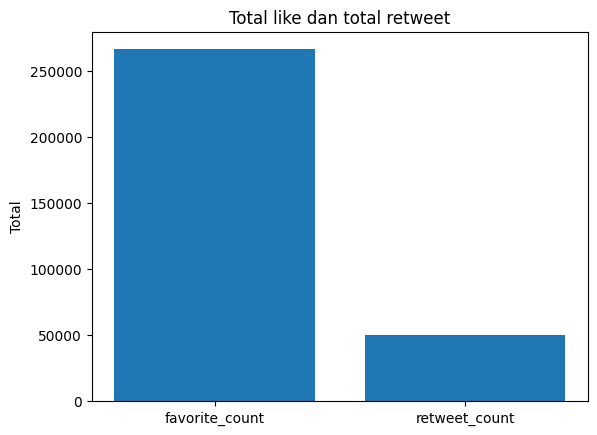

In [36]:
# Menjumlahkan nilai dalam kolom 'favorite_count' dan 'retweet_count'
total_liked = df['favorite_count'].sum()
total_retweet = df['retweet_count'].sum()

print("Total favorite_count:", total_liked)
print("Total retweet:", total_retweet)

# Membuat plot
fig, ax = plt.subplots()
ax.bar(['favorite_count', 'retweet_count'], [total_liked, total_retweet])

# Menambahkan label dan judul
ax.set_ylabel('Total')
ax.set_title('Total like dan total retweet')

# Menampilkan plot
plt.show()

<ipython-input-37-3175c130b888>:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month_year'] = df['created_at'].dt.to_period('M')


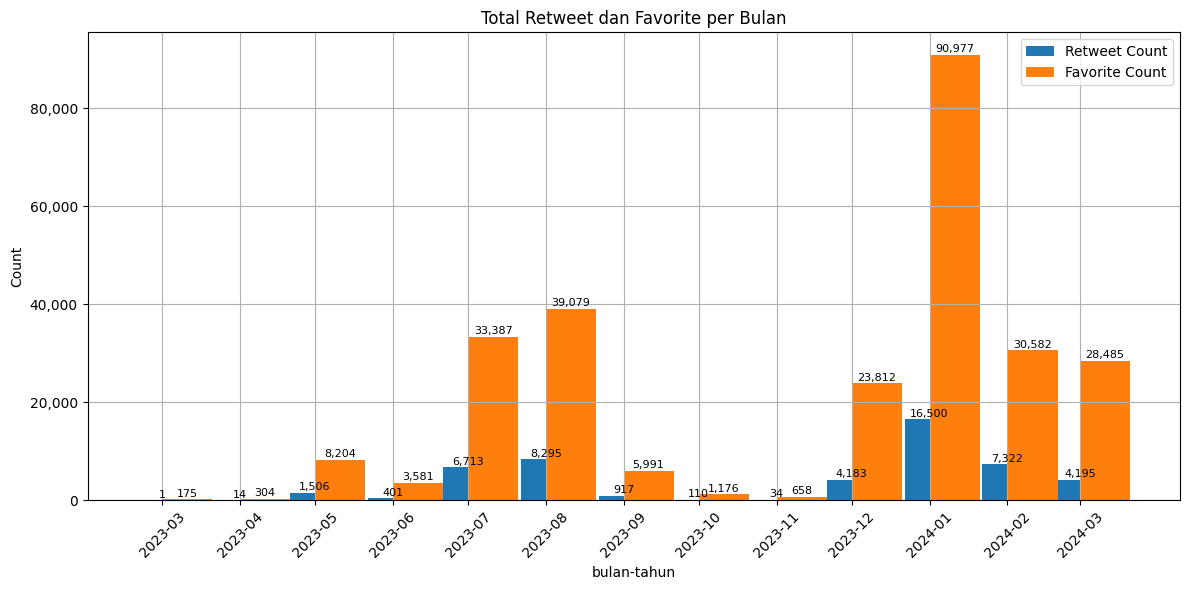

In [37]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['month_year'] = df['created_at'].dt.to_period('M')

result = df.groupby('month_year').agg({'retweet_count': 'sum', 'favorite_count': 'sum'}).reset_index()

plt.figure(figsize=(12, 6))
bars1 = plt.bar(result['month_year'].apply(lambda x: x.to_timestamp()), result['retweet_count'], label='Retweet Count', width=20)
bars2 = plt.bar(result['month_year'].apply(lambda x: x.to_timestamp()) + pd.Timedelta(days=10), result['favorite_count'], label='Favorite Count', width=20)
plt.xlabel('bulan-tahun')
plt.ylabel('Count')
plt.title('Total Retweet dan Favorite per Bulan')
plt.xticks(result['month_year'].apply(lambda x: x.to_timestamp()), result['month_year'].apply(lambda x: x.strftime('%Y-%m')), rotation=45)
plt.legend()
plt.grid(True)

# Format angka di sumbu y menjadi angka ribuan
formatter = FuncFormatter(lambda x, _: '{:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

# Tambahkan angka-angka pada setiap batang grafik
for bar1, bar2 in zip(bars1, bars2):
    plt.text(bar1.get_x() + bar1.get_width() / 2 - 0.1, bar1.get_height() + 100, '{:,.0f}'.format(bar1.get_height()), ha='center', va='bottom', color='black', fontsize=8)
    plt.text(bar2.get_x() + bar2.get_width() / 2 - 0.1, bar2.get_height() + 100, '{:,.0f}'.format(bar2.get_height()), ha='center', va='bottom', color='black', fontsize=8)

plt.tight_layout()
plt.show()

In [38]:
# Temukan indeks dengan nilai favorite_count tertinggi untuk setiap bulan
max_favorite_idx = df.groupby('month_year')['favorite_count'].idxmax()

# Dapatkan data favorite_count, retweet_count, dan tweet_url dari indeks tertinggi
max_favorite_data = df.loc[max_favorite_idx, ['month_year', 'favorite_count', 'retweet_count', 'tweet_url']]

# Tampilkan data dengan format yang lebih rapih
print("Data dengan liked twit tertinggi per tahun dan bulan:")
for index, row in max_favorite_data.iterrows():
    print(f"Bulan: {row['month_year']}, Favorite Count: {row['favorite_count']}, Retweet Count: {row['retweet_count']}")
    print(f"Tweet URL: {row['tweet_url']}\n")

Data dengan liked twit tertinggi per tahun dan bulan:
Bulan: 2023-03, Favorite Count: 51, Retweet Count: 0
Tweet URL: https://twitter.com/maulanafikri455/status/1638527287518810114

Bulan: 2023-04, Favorite Count: 257, Retweet Count: 11
Tweet URL: https://twitter.com/maulanafikri455/status/1651527710827741185

Bulan: 2023-05, Favorite Count: 6446, Retweet Count: 1286
Tweet URL: https://twitter.com/maulanafikri455/status/1660491126808412160

Bulan: 2023-06, Favorite Count: 494, Retweet Count: 74
Tweet URL: https://twitter.com/maulanafikri455/status/1673529358454259717

Bulan: 2023-07, Favorite Count: 10578, Retweet Count: 2142
Tweet URL: https://twitter.com/maulanafikri455/status/1679738430845259776

Bulan: 2023-08, Favorite Count: 23460, Retweet Count: 6084
Tweet URL: https://twitter.com/maulanafikri455/status/1693219524378870068

Bulan: 2023-09, Favorite Count: 557, Retweet Count: 136
Tweet URL: https://twitter.com/maulanafikri455/status/1701097322988601852

Bulan: 2023-10, Favorite C

<ipython-input-39-521d4f5843be>:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month_year'] = df['created_at'].dt.to_period('M')


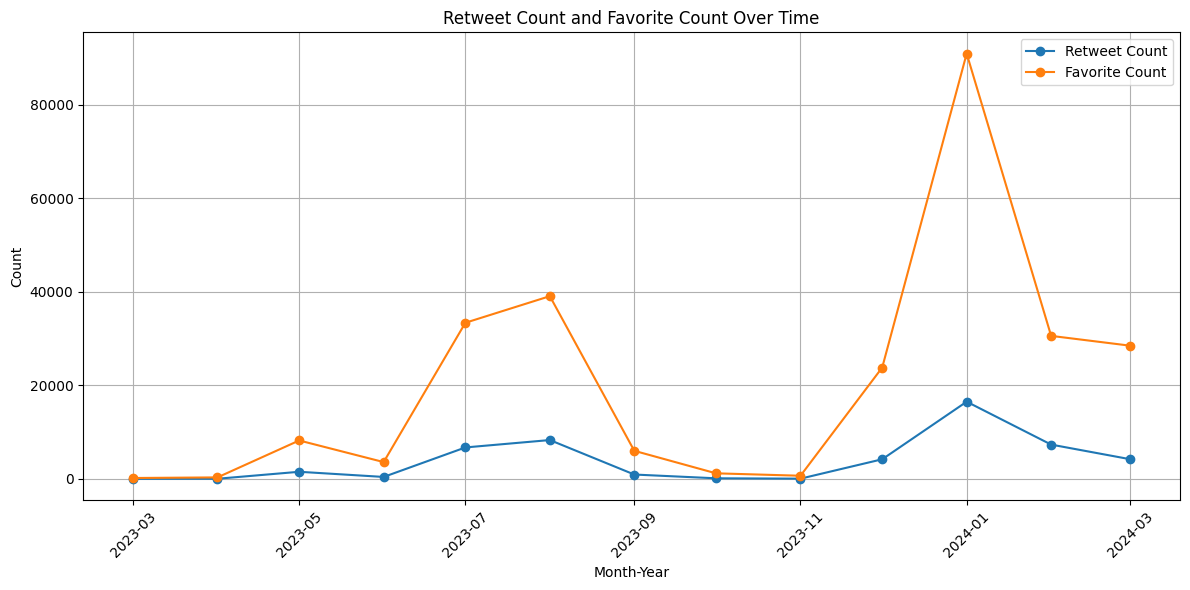

In [39]:
# Ubah format kolom created_at menjadi datetime
df['created_at'] = pd.to_datetime(df['created_at'])
# Buat kolom baru month_year
df['month_year'] = df['created_at'].dt.to_period('M')

# Groupby dan agregasi
result = df.groupby('month_year').agg({'retweet_count': 'sum', 'favorite_count': 'sum'}).reset_index()

# Visualisasi
plt.figure(figsize=(12, 6))
plt.plot(result['month_year'].apply(lambda x: x.to_timestamp()), result['retweet_count'], marker='o', label='Retweet Count')
plt.plot(result['month_year'].apply(lambda x: x.to_timestamp()), result['favorite_count'], marker='o', label='Favorite Count')
plt.xlabel('Month-Year')
plt.ylabel('Count')
plt.title('Retweet Count and Favorite Count Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


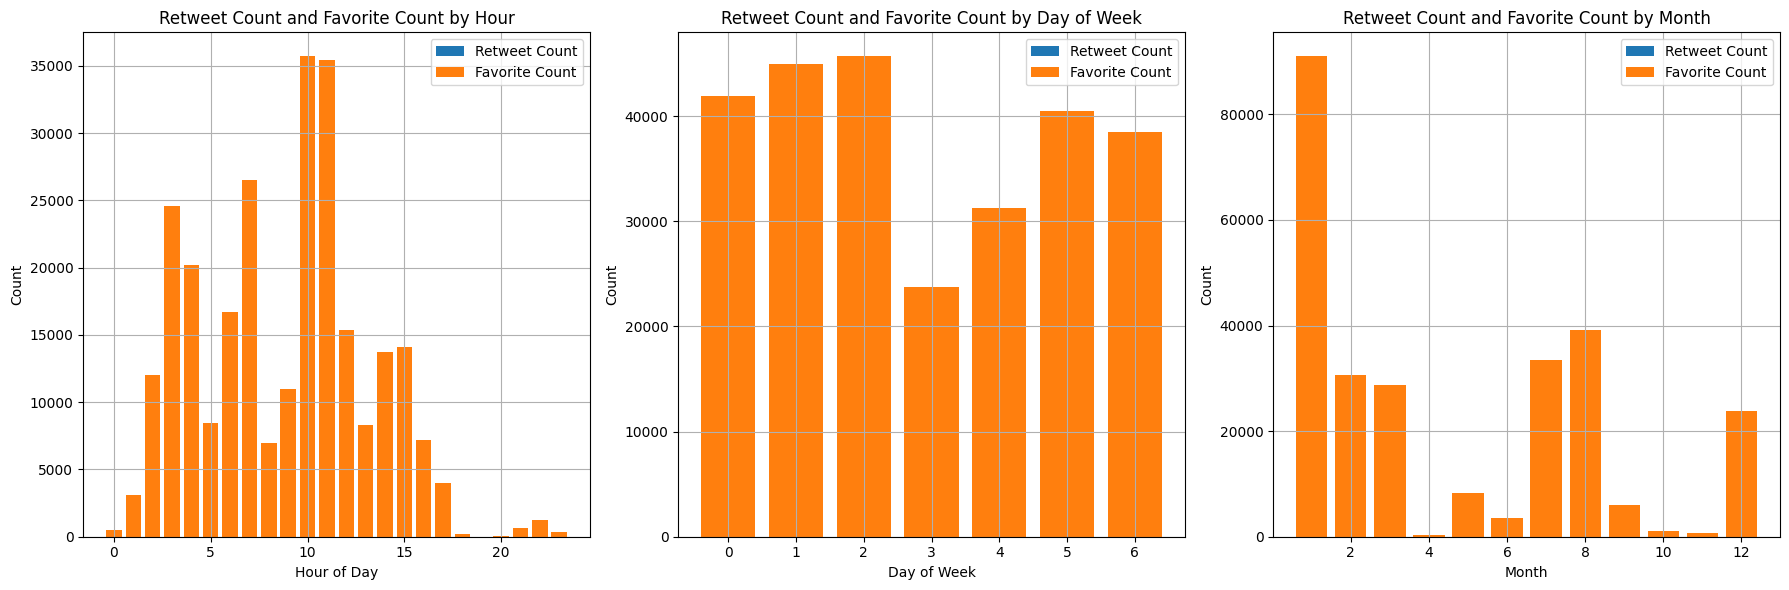

In [ ]:
import matplotlib.pyplot as plt

# Ekstrak informasi waktu
df['hour'] = df['created_at'].dt.hour
df['day_of_week'] = df['created_at'].dt.dayofweek
df['month'] = df['created_at'].dt.month

# Groupby dan agregasi
hour_data = df.groupby('hour').agg({'retweet_count': 'sum', 'favorite_count': 'sum'}).reset_index()
day_data = df.groupby('day_of_week').agg({'retweet_count': 'sum', 'favorite_count': 'sum'}).reset_index()
month_data = df.groupby('month').agg({'retweet_count': 'sum', 'favorite_count': 'sum'}).reset_index()

# Visualisasi
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.bar(hour_data['hour'], hour_data['retweet_count'], label='Retweet Count')
plt.bar(hour_data['hour'], hour_data['favorite_count'], label='Favorite Count')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.title('Retweet Count and Favorite Count by Hour')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.bar(day_data['day_of_week'], day_data['retweet_count'], label='Retweet Count')
plt.bar(day_data['day_of_week'], day_data['favorite_count'], label='Favorite Count')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Retweet Count and Favorite Count by Day of Week')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
plt.bar(month_data['month'], month_data['retweet_count'], label='Retweet Count')
plt.bar(month_data['month'], month_data['favorite_count'], label='Favorite Count')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Retweet Count and Favorite Count by Month')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
